# **Car Price prediction**

About Dataset

This dataset contains 10,000 entries created for the purpose of predicting car prices. Each row represents information about a car and its price. The descriptions of the columns are as follows:

Columns Descriptions:

Brand: Specifies the brand of the car (e.g., Toyota, BMW, Ford).
Example values: "Toyota", "BMW", "Mercedes".

Model: Specifies the model of the car (e.g., Corolla, Focus, X5).
Example values: "Corolla", "Focus", "X5".

Year: The production year of the car. Newer years typically indicate higher prices.
Example values: 2005, 2018, 2023.

Engine_Size: Specifies the engine size in liters (L). Larger engines generally correlate with higher prices.
Example values: 1.6, 2.0, 3.5.

Fuel_Type: indicates the type of fuel used by the car:
Petrol: Cars running on gasoline.
Diesel: Cars running on diesel fuel.
Hybrid: Cars that use both fuel and electricity.
Electric: Fully electric cars.

Transmission: The type of transmission in the car:
Manual: Manual transmission.
Automatic: Automatic transmission.
Semi-Automatic: Semi-automatic transmission.

Mileage: The total distance the car has traveled, measured in kilometers. Lower mileage generally indicates a higher price.
Example values: 15,000, 75,000, 230,000.

Doors: The number of doors in the car. Commonly 2, 3, 4, or 5 doors.
Example values: 2, 3, 4, 5.

Owner_Count: The number of previous owners of the car. Fewer owners generally indicate a higher price.
Example values: 1, 2, 3, 4.

Price:The estimated selling price of the car. It is calculated based on several factors such as production year, engine size, mileage, fuel type, and transmission.

## **Load Dataset**

In [286]:
import pandas as pd

# Load the dataset
df = pd.read_csv('car_price_dataset.csv')

# Display the first few rows
print(df.head())

# Check for missing values and data types
print(df.info())

print(df.describe())


        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size

### **Data visualization of Dataset**

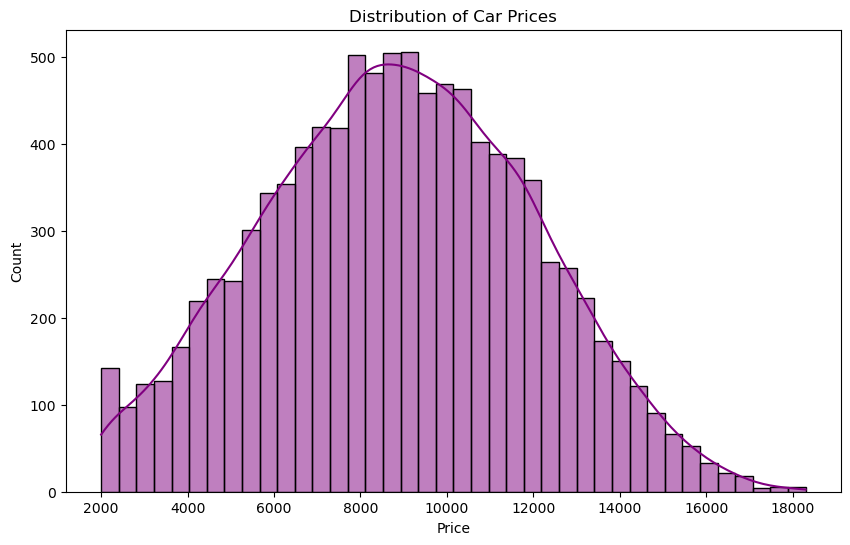

In [289]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df["Price"], kde=True, color='purple')
plt.title("Distribution of Car Prices")
plt.show()


### **Handle missing values**

In [292]:

df = df.dropna()  

# Convert categorical columns to numerical ones (example: "make", "model", etc.)
df = pd.get_dummies(df, drop_first=True)  # One-Hot Encoding for categorical features

### **Separate the features (x) and target (y)**

In [295]:
y = df['Price']
x = df.drop('Price', axis=1) 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [297]:
y

0        8501
1       12092
2       11171
3       11780
4        2867
        ...  
9995     8884
9996     6240
9997     9866
9998     4084
9999     3342
Name: Price, Length: 10000, dtype: int64

In [299]:
x

array([[ 1.22602090e+00,  1.04365690e+00,  1.63007524e+00, ...,
        -5.63491843e-01,  1.40199824e+00, -7.03556521e-01],
       [ 6.61558054e-02, -8.70607405e-01, -1.66689517e+00, ...,
        -5.63491843e-01, -7.13267660e-01, -7.03556521e-01],
       [ 1.22602090e+00,  1.04365690e+00,  9.52302614e-01, ...,
        -5.63491843e-01, -7.13267660e-01, -7.03556521e-01],
       ...,
       [-2.23810469e-01, -4.87267277e-04, -7.24936723e-01, ...,
         1.77464858e+00, -7.13267660e-01, -7.03556521e-01],
       [-1.38367556e+00, -1.39267949e+00,  8.86638467e-01, ...,
        -5.63491843e-01, -7.13267660e-01, -7.03556521e-01],
       [-1.52865870e+00, -7.83595391e-01,  1.00128420e-01, ...,
        -5.63491843e-01,  1.40199824e+00, -7.03556521e-01]])

### **Split the data into train and test sets**

In [302]:
  from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [304]:
x_train

array([[-0.65875988,  0.17353676, -1.335655  , ..., -0.56349184,
        -0.71326766,  1.42134991],
       [-0.22381047,  1.56572898,  0.87599179, ..., -0.56349184,
        -0.71326766,  1.42134991],
       [-0.80374302, -0.95761942, -1.57329943, ..., -0.56349184,
        -0.71326766,  1.42134991],
       ...,
       [-0.80374302,  1.30469294, -1.10206534, ...,  1.77464858,
        -0.71326766,  1.42134991],
       [ 0.64608835,  1.21768093,  1.34249918, ..., -0.56349184,
        -0.71326766,  1.42134991],
       [ 1.37100404, -1.13164345,  0.77063721, ..., -0.56349184,
        -0.71326766,  1.42134991]])

In [306]:
x_test

array([[-0.94872615, -1.56670351,  1.25722152, ..., -0.56349184,
         1.40199824, -0.70355652],
       [ 0.21113894, -0.08749928, -0.43385039, ..., -0.56349184,
        -0.71326766, -0.70355652],
       [-0.07882733,  1.73975301, -1.5728592 , ..., -0.56349184,
        -0.71326766, -0.70355652],
       ...,
       [-0.94872615,  0.69560884, -0.12143594, ..., -0.56349184,
        -0.71326766, -0.70355652],
       [-0.80374302,  0.08652475,  0.4669695 , ...,  1.77464858,
        -0.71326766, -0.70355652],
       [-0.07882733,  0.4345728 , -0.83442717, ..., -0.56349184,
        -0.71326766, -0.70355652]])

In [308]:
y_train

9254     9721
1561     9402
1670     8531
6087     7503
6669    10694
        ...  
5734     2969
5191    10635
5390     9317
860      7997
7270     8784
Name: Price, Length: 8000, dtype: int64

In [310]:
y_test

6252     2000
4684    11164
1731    14630
4742     7334
4521    10127
        ...  
6412     4681
8285    12839
7853     8124
1095     6709
6929    11855
Name: Price, Length: 2000, dtype: int64

## ''**Models**''

### 1. **Linear Regression**

#### ***Traning the Model***

In [315]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create the model
model = LinearRegression()

# Train the model
model.fit(x_train, y_train)

LinearRegression()

#### ***Predicition of Model***

In [318]:
y_pred = model.predict(x_train)
y_predi = model.predict(x_test)


In [320]:
print(y_pred)

[9711.99134375 9392.49134375 8533.99134375 ... 9321.99134375 8014.24134375
 8792.99134375]


In [322]:
print(y_predi)

[ 1692.11634375 11150.49134375 14598.49134375 ...  8131.99134375
  6729.24134375 11839.83509375]


#### ***Model Performance***

In [325]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'R-squared (R²) accuracy: {r2}')

Mean Squared Error: 4227.280493600006
R-squared: 0.9995399034543585
R-squared (R²) accuracy: 0.9995399034543585


### **Data Visualization of predicted Dataset**

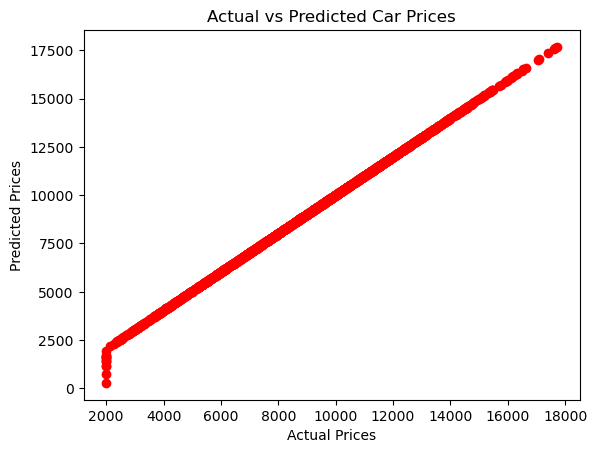

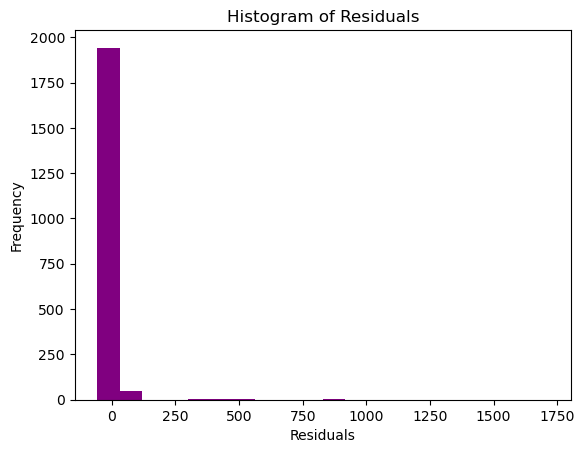

In [328]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted prices
plt.scatter(y_test, y_pred, c='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.show()

# Histogram of the residuals (difference between actual and predicted)
residuals = y_test - y_pred
plt.hist(residuals, bins=20, color='purple')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


***The Accuracy of Linear Regreesion model is 99.95% .***

### 2. **Random Forest**

#### ***Traning the Model***

In [333]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

#### ***Prediction of Model***

In [335]:
rf_y_pred = rf_model.predict(x_test)

#### ***Model Performance***

In [172]:
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f'Random Forest - Mean Squared Error: {rf_mse}')
print(f'Random Forest - R-squared: {rf_r2}')

Random Forest - Mean Squared Error: 297207.185929
Random Forest - R-squared: 0.9676520165168121


In [182]:
print(f'R-squared (R²) accuracy: {rf_r2}')

R-squared (R²) accuracy: 0.9676520165168121


### **Data Visualization of predicted Dataset**

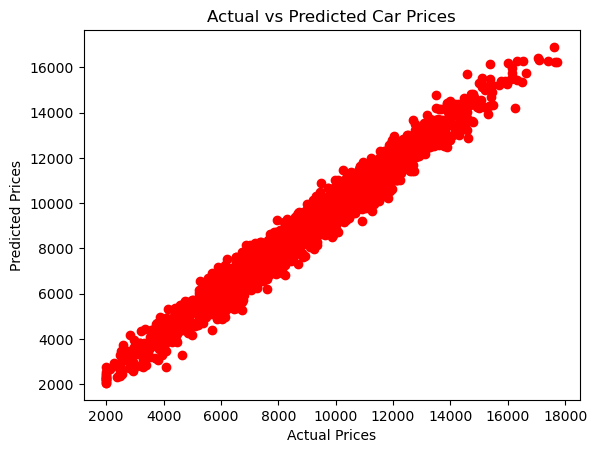

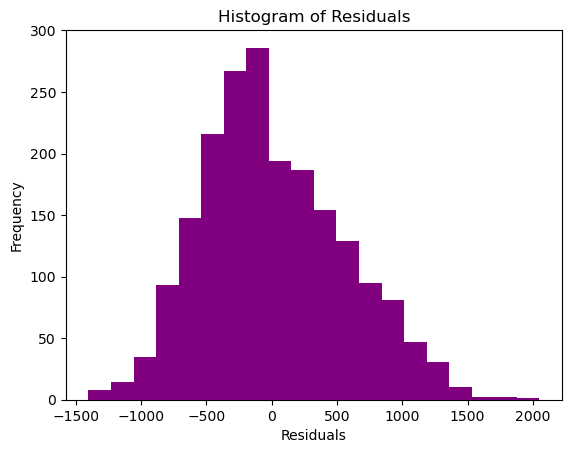

In [199]:
# Scatter plot of actual vs predicted prices
plt.scatter(y_test, rf_y_pred, c='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.show()

# Histogram of the residuals (difference between actual and predicted)
residuals = y_test - rf_y_pred
plt.hist(residuals, bins=20, color='purple')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

***The Accuracy of Random Forest Model is 97.76% .***

### 3. **Gradient Boosting Model**

#### ***Training the model***

In [225]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

gb_model.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

#### ***Prediction of Model***

In [230]:
gb_y_pred = gb_model.predict(x_test)

#### ***Model Performance***

In [233]:
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

print("\nGradient Boosting Model:")
print(f'Mean Squared Error (MSE): {gb_mse}')
print(f'R-squared (R²) accuracy: {gb_r2}')


Gradient Boosting Model:
Mean Squared Error (MSE): 50929.19562914584
R-squared (R²) accuracy: 0.9944568743387745


### **Data Visualization of predicted Dataset**

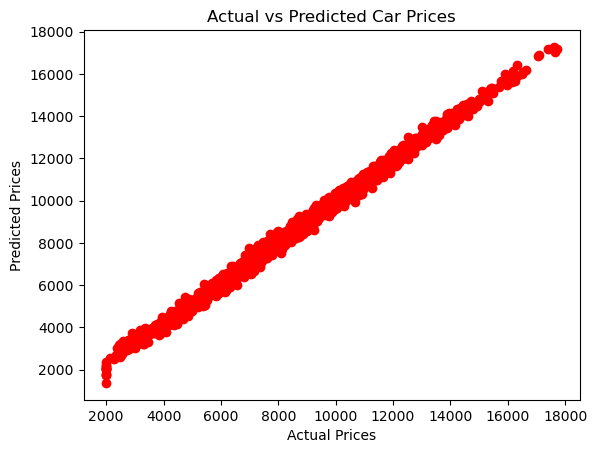

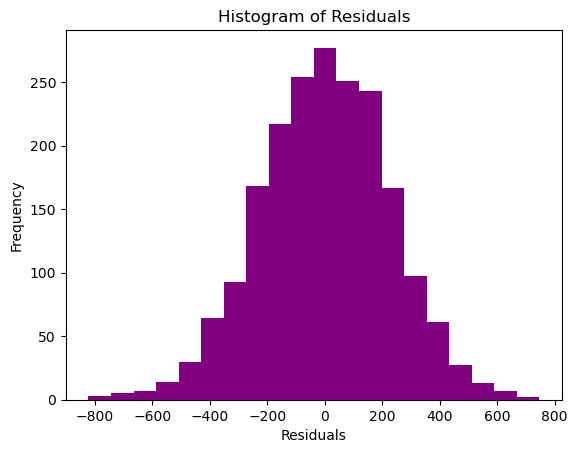

In [239]:
# Scatter plot of actual vs predicted prices
plt.scatter(y_test, gb_y_pred, c='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.show()

# Histogram of the residuals (difference between actual and predicted)
residuals = y_test - gb_y_pred
plt.hist(residuals, bins=20, color='purple')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

***The Accuracy of Gradient Boosting Model is 99.44% .***

### 4. **Support Vector Regressor Model** 

#### ***Traning the Model***

In [253]:
from sklearn.svm import SVR

svr_model = SVR()

svr_model.fit(x_train, y_train)

SVR()

#### ***Prediction of Model***

In [257]:
svr_y_pred = svr_model.predict(x_test)

#### ***Model Performance***

In [260]:
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)

print("\nSupport Vector Regressor Model:")
print(f'Mean Squared Error (MSE): {svr_mse}')
print(f'R-squared (R²) accuracy: {svr_r2}')


Support Vector Regressor Model:
Mean Squared Error (MSE): 8972850.778499292
R-squared (R²) accuracy: 0.02339632915422385


### **Data Visualization of predicted Dataset**

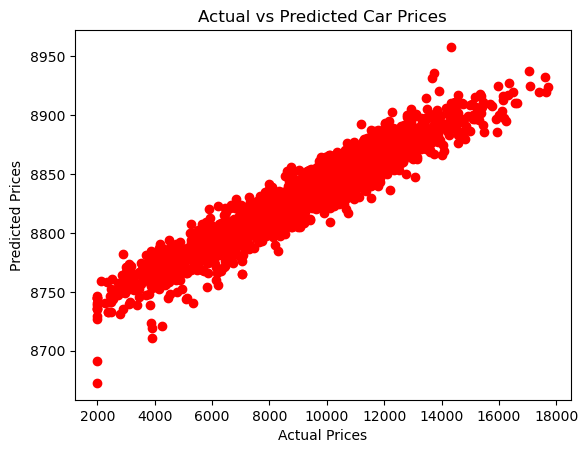

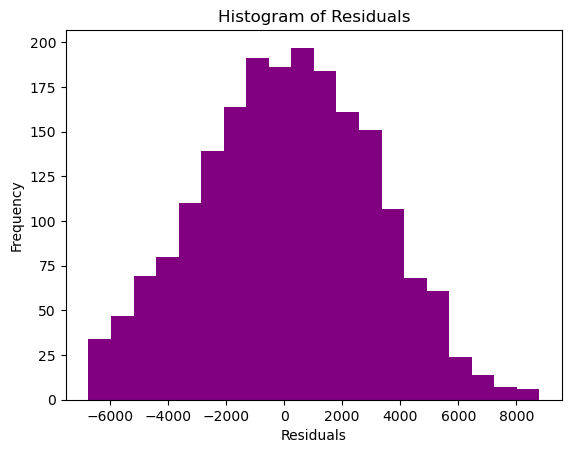

In [268]:
# Scatter plot of actual vs predicted prices
plt.scatter(y_test,  svr_y_pred, c='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.show()

# Histogram of the residuals (difference between actual and predicted)
residuals = y_test -  svr_y_pred
plt.hist(residuals, bins=20, color='purple')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

***The Accuracy of Support Vector Regressor Model is 2.33% .***

## **Conclusion**
#### ***Accuracy of models are:***

**Linear Regression = 99.95%**

**Random Forest = 97.76%**

**Gradient Boosting Model = 99.44%**

**Support Vector Regressor Model = 2.33%**